In [77]:
import numpy as np
from matplotlib import pyplot as plt
from common.baseclasses import AWA

from NearFieldOptics import Materials as M
from NearFieldOptics import TipModels as T

# Examine reflectivities

## Truly 2D graphene

In [64]:
fs=np.linspace(500,4000,500)
qs=np.logspace(-1,2,500)*1/30e-7

SLG=M.SingleLayerGraphene(chemical_potential=1500,gamma=30)

rp0=SLG.reflection_p(fs,qs)

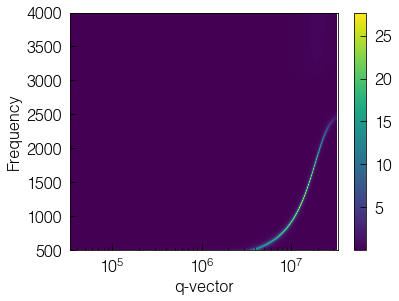

In [65]:
np.imag(rp0).T.plot()
plt.gca().set_xscale('log')

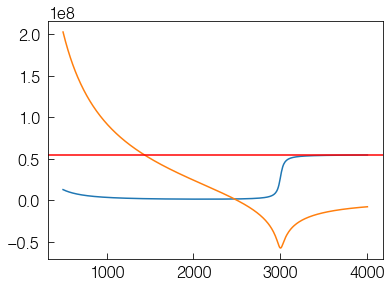

In [66]:
sigma2D=SLG.conductivity(fs)
plt.plot(ws,sigma2D.real)
plt.plot(ws,sigma2D.imag)
plt.axhline(3e10/137/4,color='r') #as expected for reflectivity from conductance quantum

## Graphene-as-slab

In [67]:
d=1e-7
c=3e10
omegas=2*np.pi*c*fs
eps=1+4*np.pi*1j*sigma2D/(d*omegas)

epsdata=AWA(eps,axes=[ws])
SLGmat=M.TabulatedMaterial(epsdata)

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/alexandersmcleod/tools/python/common/baseclasses.py:473: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  try: result=ndarray_operator(self,*args,**kwargs)
/Users/alexandersmcleod/tools/python/common/baseclasses.py:482: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  for axis_grid in axis_grids]


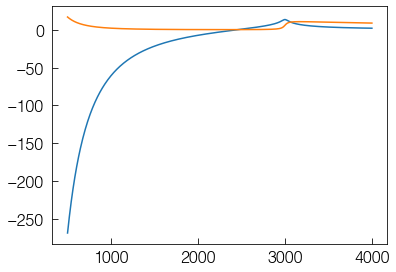

In [68]:
e=SLGmat.epsilon(ws)
plt.plot(ws,e.real)
plt.plot(ws,e.imag)

In [72]:
slab=M.LayeredMediaTM((SLGmat,d),exit=M.Air)
rp1=slab.reflection_p(ws,qs)

## Compare reflectivities - they are the same

(500.0, 2000.0)

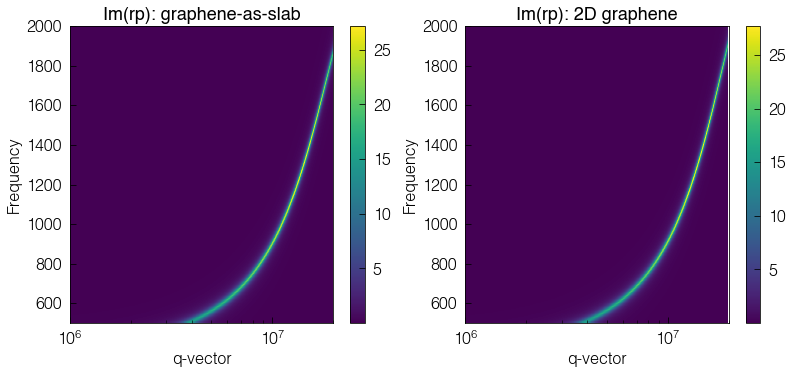

In [98]:
plt.figure(figsize=(13,5))
plt.subplot(121)
np.imag(rp1).T.plot()
plt.gca().set_xscale('log')
plt.title('Im(rp): graphene-as-slab')
plt.xlim(1e6,2e7)
plt.ylim(500,2000)

plt.subplot(122)
np.imag(rp0).T.plot()
plt.gca().set_xscale('log')
plt.title('Im(rp): 2D graphene')
plt.xlim(1e6,2e7)
plt.ylim(500,2000)

# Compute near-field signal

In [80]:
fs=np.linspace(500,2000,100)

layers0=M.LayeredMediaTM(SLG,exit=M.SiO2_300nm)
s0=T.LRM(fs,rp=layers0.reflection_p,
         normalize_to=M.Si.reflection_p,normalize_at=1000)

layers1=M.LayeredMediaTM((SLGmat,d),exit=M.SiO2_300nm)
s1=T.LRM(fs,rp=layers1.reflection_p,
         normalize_to=M.Si.reflection_p,normalize_at=1000)

<NearFieldOptics.TipModels._LightningRodModel_.__call__>:
	Getting signal...
<NearFieldOptics.TipModels._LightningRodModel_.get_signal>:
	Computing near-field signal with Lightning Rod Model...
<NearFieldOptics.TipModels._LightningRodModel_.prepare_model>:
	Preparing model...
<NearFieldOptics.TipModels._LightningRodModel_.load_charge_data>:
	Loading charge data from file "/Users/alexandersmcleod/tools/python/NearFieldOptics/TipModels/ChargeData/HyperboloidCharge_L=6.33E+02_SkinDepth=5.00E-02_Taper=20_Quad=TS_Nzs=244_Nqs=244_freq=3.00E-03.pickle"...
	Using incident beam profile: "plane_wave"
	Incidence angle: 30 degrees
	Computing xWarp quadrature for q-values...
	PROGRESS: 0% - Computing state of the tip charge v. z & s at freq=500.0 cm^-1...
	PROGRESS: 1% - Computing state of the tip charge v. z & s at freq=515.1515151515151 cm^-1...
	PROGRESS: 2% - Computing state of the tip charge v. z & s at freq=530.3030303030303 cm^-1...
	PROGRESS: 3% - Computing state of the tip charge v. z & s 

	PROGRESS: 80% - Computing state of the tip charge v. z & s at freq=1712.1212121212122 cm^-1...
	PROGRESS: 81% - Computing state of the tip charge v. z & s at freq=1727.2727272727273 cm^-1...
	PROGRESS: 82% - Computing state of the tip charge v. z & s at freq=1742.4242424242425 cm^-1...
	PROGRESS: 83% - Computing state of the tip charge v. z & s at freq=1757.5757575757577 cm^-1...
	PROGRESS: 84% - Computing state of the tip charge v. z & s at freq=1772.7272727272727 cm^-1...
	PROGRESS: 85% - Computing state of the tip charge v. z & s at freq=1787.878787878788 cm^-1...
	PROGRESS: 86% - Computing state of the tip charge v. z & s at freq=1803.030303030303 cm^-1...
	PROGRESS: 87% - Computing state of the tip charge v. z & s at freq=1818.1818181818182 cm^-1...
	PROGRESS: 88% - Computing state of the tip charge v. z & s at freq=1833.3333333333335 cm^-1...
	PROGRESS: 89% - Computing state of the tip charge v. z & s at freq=1848.4848484848485 cm^-1...
	PROGRESS: 90% - Computing state of the ti

	PROGRESS: 54% - Computing state of the tip charge v. z & s at freq=1318.1818181818182 cm^-1...
	PROGRESS: 55% - Computing state of the tip charge v. z & s at freq=1333.3333333333335 cm^-1...
	PROGRESS: 56% - Computing state of the tip charge v. z & s at freq=1348.4848484848485 cm^-1...
	PROGRESS: 56% - Computing state of the tip charge v. z & s at freq=1363.6363636363635 cm^-1...
	PROGRESS: 57% - Computing state of the tip charge v. z & s at freq=1378.787878787879 cm^-1...
	PROGRESS: 59% - Computing state of the tip charge v. z & s at freq=1393.939393939394 cm^-1...
	PROGRESS: 60% - Computing state of the tip charge v. z & s at freq=1409.090909090909 cm^-1...
	PROGRESS: 61% - Computing state of the tip charge v. z & s at freq=1424.2424242424242 cm^-1...
	PROGRESS: 62% - Computing state of the tip charge v. z & s at freq=1439.3939393939395 cm^-1...
	PROGRESS: 63% - Computing state of the tip charge v. z & s at freq=1454.5454545454545 cm^-1...
	PROGRESS: 64% - Computing state of the tip

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/alexandersmcleod/tools/python/common/baseclasses.py:473: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  try: result=ndarray_operator(self,*args,**kwargs)
/Users/alexandersmcleod/tools/python/common/baseclasses.py:482: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

Text(0, 0.5, 'Phase (radians)')

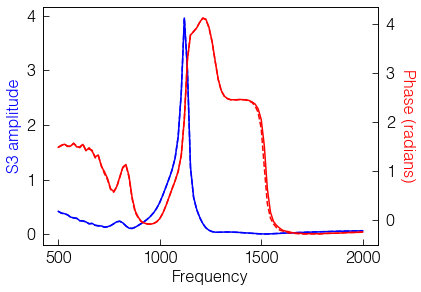

In [94]:
np.abs(s0['signal_3']).plot(color='b',label='2D graphene')
np.abs(s1['signal_3']).plot(ls='--',color='b',label='graphene-as-slab')
plt.ylabel('S3 amplitude',color='b')

plt.twinx()

plt.plot(fs,np.unwrap(np.angle(s0['signal_3'])),color='r',ls='-')
plt.plot(fs,np.unwrap(np.angle(s1['signal_3'])),color='r',ls='--')
plt.ylabel('Phase (radians)',color='r',labelpad=20,rotation=270)